# DS 2500 HW 4

Due: Fri Mar 3 @ 11:59PM

### Submission Instructions
Please submit both of the following to the corresponding [gradescope](https://www.gradescope.com/courses/478298) assignment:
- this `.ipynb` file 
    - give a fresh `Kernel > Restart & Run All` just before uploading
- a `.py` file consistent with your `.ipynb`
    - `File > Download as ...`
    
Gradescope may run your `.py` submission to determine part of your score for this assignment.  See the [autograder instructions](https://github.com/matthigger/gradescope_auto_py/blob/main/stud_instruct.md) for details.


### Tips for success
- Start early
- Make use of [Piazza](https://course.ccs.neu.edu/ds2500/admin_piazza.html)
- Make use of [Office Hours](https://course.ccs.neu.edu/ds2500/office_hours.html)
- Remember that [Documentation / style counts for credit](https://course.ccs.neu.edu/ds2500/python_style.html)
- [No student may view or share their ungraded homework with another](https://course.ccs.neu.edu/ds2500/syllabus.html#academic-integrity-and-conduct)

### This HW has 83 points

## Part 1: Covariance Matching (18 auto points)

Match each of the covariance matrices to the dataset which is most consistent.  Note that all scatterplots below have equal scales in the x and y axes (moving an inch to the right increases $x_0$ as much as moving an inch up increases $x_1$).  

Please express your response as dictionary named `part1_dict` whose keys are uppercase letters and values are numbers from 0 to 8.  For example:

```python
part1_dict = {'A': 0, 'B': 2, 'C': 1}
```

indicates that data set A is associated with $\Sigma_0$.  This dictionary allows us to automatically grade your responses here.  Note that your scores on this question will only be visible after the late submission deadline.

### Please submit a file named `hw4_stud.py` to gradescope to grade this question

<img src="https://i.ibb.co/K7DY3mx/cov3by3.png" alt="Drawing" style="width: 600px;"/>


$$\Sigma_0 =\begin{bmatrix} 
5 & 1\\ 
1 & 2
\end{bmatrix}, 
\Sigma_1 =\begin{bmatrix} 
4 & 0\\ 
0 & 0
\end{bmatrix}, 
\Sigma_2 =\begin{bmatrix} 
1 & -1\\ 
-1 & 7
\end{bmatrix}, 
\Sigma_3 =\begin{bmatrix} 
7 & 4\\ 
4 & 5
\end{bmatrix}, 
\Sigma_4 =\begin{bmatrix} 
5 & 3\\ 
3 & 2
\end{bmatrix}$$

$$\Sigma_5 =\begin{bmatrix} 
6 & 2\\ 
2 & 6
\end{bmatrix}, 
\Sigma_6 =\begin{bmatrix} 
4 & -2\\ 
-2 & 5
\end{bmatrix}, 
\Sigma_7 =\begin{bmatrix} 
1 & -2\\ 
-2 & 5
\end{bmatrix}, 
\Sigma_8 =\begin{bmatrix} 
2 & 0\\ 
0 & 2
\end{bmatrix}$$

In [1]:
part1_dict = {'A': 4, 'B': 7, 'C': 5 , 'D': 8, 'E': 3, 'F': 6, 'G': 1, 'H': 0, 'I': 2}

# Part 2: Scale in Covariance & Correlation (15 points + 1)

This problem uses `covid_data.csv` which measures the total new daily COVID cases each day in Massachusetts, California and NEU.  

For example, if feature `MA` is 1 on 3/16/2021 then there was 1 reported new COVID case on 3/16/2021.

In [2]:
import pandas as pd

df_covid = pd.read_csv('covid_data.csv', index_col='date')

In [3]:
df_covid.cov()

,MA,CA,NEU
MA,4.217750e+06,2.351385e+07,6864.562272
CA,2.351385e+07,1.980773e+08,40762.364969
NEU,6.864562e+03,4.076236e+04,30.653335


One might (incorrectly) reason:

    "The covariance between MA and CA is about 23 million, which is much larger than the covariance between CA and NEU (about 4 thousand).  Therefore, I conclude that infections in MA and CA must change more consistently together than CA and NEU."

Identify and correct this interpretation by writing three or four sentences which:
- correctly identify the thinking error:
    - why is cov(MA, CA) > cov(CA, NEU)?
    - what should we use to measure the consistency with which values change?
- clearly explain / teach the difference so that a non-technical audience may understand
- utilize a few python commands to illustrate your language with numerical examples

Bonus (+1 point): Hypothesize why NU's relationship to the other states is different than between MA and CA.

#### Currently, the covariance is incorrectly calculated based on differing variances for each group. In simple terms, because the spread of the data for MA, CA, and NEU are widely different and have differing ranges, comparing them with each other will produce skewed results. Observe the variances below: 

In [4]:
df_covid.var()

MA     4.217750e+06
CA     1.980773e+08
NEU    3.065334e+01
dtype: float64

#### Groups with higher variances will disproportionately affect the calculated covariances. MA and CA have large variances, which is why their covariance is significantly higher. To solve this issue, we can scale the data to normalize the variances so that they can properly be compared:

In [5]:
# scale variances
df_covid_scaled = pd.DataFrame()
for feat in df_covid.columns:
    df_covid_scaled[f'{feat}_scaled'] = df_covid[feat] / df_covid[feat].std()
    
df_covid_scaled

,MA_scaled,CA_scaled,NEU_scaled
date,,,
2021-03-03,0.924665,0.238170,1.986798
2021-03-02,0.146564,0.179977,1.806180
2021-03-01,0.679256,0.249822,1.986798
2021-02-28,0.714802,0.332883,1.264326
2021-02-27,0.827768,0.365994,0.722472
...,...,...,...
2020-08-21,0.237618,0.396831,0.000000
2020-08-20,0.152407,0.420634,0.000000
2020-08-19,0.402685,0.437971,0.180618


In [6]:
df_covid_scaled.var()

MA_scaled     1.0
CA_scaled     1.0
NEU_scaled    1.0
dtype: float64

#### Once the data is scaled and the variances are the same, the covariances can be properly calculated to reflect the true relationships between the groups:

In [7]:
df_covid_scaled.cov()

,MA_scaled,CA_scaled,NEU_scaled
MA_scaled,1.000000,0.813516,0.603717
CA_scaled,0.813516,1.000000,0.523122
NEU_scaled,0.603717,0.523122,1.000000


#### Because Northeastern has campuses in both MA and CA, the relationship between COVID cases in these states and the University are potentially stronger than for other states. Furthermore, both California and Massachusetts were among the first states in the US to implement strict measures in response to the pandemic, and their similar responses may be why Northeastern's relationship with them is stronger than that with other states.

# Part 3: Beans!

In this problem we'll use the k-Nearest Neighbor classifier to classify the species of plant that a bean comes from [a very large collection of bean image data](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset).
- use the csv loaded below
- each subpart requires the completion of all previous sub-parts
- **you are intended to make scale normalization / cross validation errors in earlier parts**
    - these will be addressed in later parts

In [8]:
import pandas as pd

df_bean = pd.read_csv('dry_bean.csv')

df_bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Part 3.1: a not-quite-right K-NN classifier  (12 points)
Build a 21-Nearest Neighbor classifier which is `fit` and `predict`s on the whole, raw dataset.

In [9]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

# set k value
k = 21

# extract data into matrix
y_feat = 'Class'
x = df_bean.iloc[:, 0:-1].values
y_true = df_bean.loc[:, y_feat].values

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# fit happens "inplace", we modify the internal state of knn_classifier (it remembers all the training samples)
knn_classifier.fit(x, y_true)

# estimate each bean species
y_pred = knn_classifier.predict(x)
y_pred

array(['DERMASON', 'DERMASON', 'DERMASON', ..., 'SIRA', 'SIRA', 'SEKER'],
      dtype=object)

## Part 3.2: Confusion Matrix (12 points)
Plot the confusion matrix which results part 3.1.

Using the confusion matrix, identify the bean with lowest accuracy (% of these beans classified correctly)
- explicitly compute accuracy for this particular bean
    - you may manually copy and paste values from the confusion matrix into a new cell
        - e.g. `387 / (387 + 3 + 10)` or similar
- telling which other bean it is most commonly mistaken for

Your response should be one or two sentences.

[[ 632    0  430    0  225    0   35]
 [   0  520    2    0    0    0    0]
 [ 334    0 1167    0  122    1    6]
 [   0    0    0 3209    1  197  139]
 [ 101    0   67   56 1295    4  405]
 [   0    0    0  431   35 1100  461]
 [   0    0    1  268  218   86 2063]]


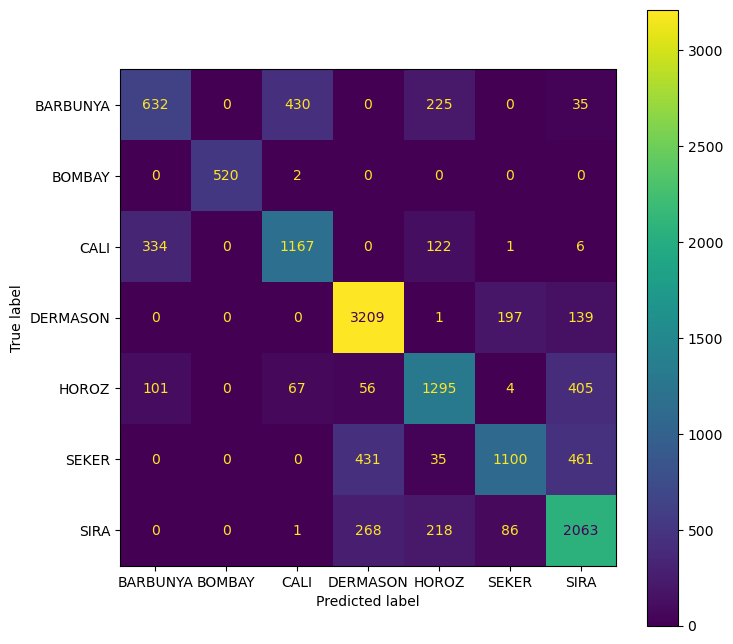

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# build and plot confusion matrix
conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))
conf_mat_disp.plot()

plt.gcf().set_size_inches(8, 8)

plt.grid(False)
print(conf_mat)

In [11]:
print("BARBUNYA: ", 632 / (632 + 430 + 225 + 35))
print("BOMBAY:   ", 520 / (520 + 2))
print("CALI:     ", 1167 / (334 + 1167 + 122 + 1 + 6))
print("DERMASON: ", 3209 / (3029 + 1 + 197 + 139))
print("HOROZ:    ", 1295 / (101 + 67 + 56 + 1295 + 4 + 405))
print("SEKER:    ", 1100 / (431 + 35 + 1100 + 461))
print("SIRA:     ", 2063 / (1 + 268 + 218 + 86 + 2063))

BARBUNYA:  0.47806354009077157
BOMBAY:    0.9961685823754789
CALI:      0.7159509202453987
DERMASON:  0.9533571004159239
HOROZ:     0.6716804979253111
SEKER:     0.5426739023186976
SIRA:      0.7826251896813353


#### According to the calculations above, the Barbunya bean has the lowest accuracy of 47.8% of beans classified correctly. The confusion matrix shows that it is most often mistaken with Cali beans, 430/1322 times.

## Part 3.3: Scale Normalization (10 points)
- In a few sentences, describe how the scale of the data may be causing issues in the classifier's performance. 
    - Explicitly compute the variance of the raw `df_bean` dataset and refer to it in your explanation.
- Build a new dataframe which resolves this issue
    - don't retrain and assess the classifier just yet ... we have another problem to fix too (see part 3.4)

In [12]:
df_bean.var()

/var/folders/vm/dcq1hzns3h1_dw72fsk3z0dc0000gp/T/ipykernel_46056/1461227889.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_bean.var()


Area               8.599026e+08
Perimeter          4.592007e+04
MajorAxisLength    7.343494e+03
MinorAxisLength    2.022309e+03
AspectRation       6.085026e-02
Eccentricity       8.464324e-03
ConvexArea         8.865456e+08
EquivDiameter      3.501932e+03
Extent             2.409471e-03
Solidity           2.171913e-05
roundness          3.542617e-03
Compactness        3.808552e-03
ShapeFactor1       1.272380e-06
ShapeFactor2       3.550668e-07
ShapeFactor3       9.800238e-03
ShapeFactor4       1.906595e-05
dtype: float64

#### The variances above greatly influence the performance of the classifier as the classifier uses differences between points to classify the testing set. With different scales, categories with greater ranges will cause disproportionate predictions as the distances assume that a change of 1 unit is equally significant. To fix this, the scale can be normalized to set all variances equal to better evaluate the data.

In [13]:
# build empty data frame for new scaled values
df_bean_scaled = pd.DataFrame()

# go through each feature and scale all the numbers
for feat in df_bean.columns:
    if feat != 'Class':
        df_bean_scaled[f'{feat}_scaled'] = df_bean[feat] / df_bean[feat].std()
    
    # class column can't be scaled
    else:
        df_bean_scaled[feat] = df_bean[feat]
df_bean_scaled

,Area_scaled,Perimeter_scaled,MajorAxisLength_scaled,MinorAxisLength_scaled,AspectRation_scaled,Eccentricity_scaled,ConvexArea_scaled,EquivDiameter_scaled,Extent_scaled,Solidity_scaled,roundness_scaled,Compactness_scaled,ShapeFactor1_scaled,ShapeFactor2_scaled,ShapeFactor3_scaled,ShapeFactor4_scaled,Class
0,0.968316,2.847972,2.429314,3.866764,4.853247,5.976105,0.964402,3.213085,15.562825,212.183594,16.095916,14.799976,6.499572,5.281796,8.426816,228.726338,SEKER
1,0.979877,2.977362,2.340005,4.063466,4.448530,4.475841,0.979751,3.232208,15.971199,211.353104,14.903147,15.456284,6.186764,5.980490,9.190767,228.659107,SEKER
2,1.001906,2.912459,2.483554,3.912181,4.904006,6.116484,0.997148,3.268339,15.851922,212.334392,15.924920,14.725705,6.421918,5.114720,8.342452,228.804719,SEKER
3,1.023322,3.014069,2.457086,4.058620,4.676688,5.419635,1.031875,3.303085,15.944983,209.574309,15.187132,15.042566,6.220514,5.394693,8.705333,227.690019,SEKER
4,1.027824,2.893905,2.355444,4.231241,4.300327,3.626883,1.021565,3.310342,15.749751,212.620737,16.547025,15.726156,5.937075,6.150573,9.514515,228.827603,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,1.435577,3.545182,3.369209,4.134853,6.294544,8.315082,1.427645,3.912252,14.557490,212.500142,15.399947,12.993358,6.080226,2.935339,6.495078,228.648782,DERMASON
13607,1.435713,3.534930,3.285828,4.240888,5.985279,7.996610,1.427174,3.912438,16.296643,212.590350,15.490878,13.323708,5.929191,3.164817,6.829545,228.610629,DERMASON
13608,1.437009,3.543432,3.285403,4.251447,5.969641,7.978812,1.429693,3.914203,14.870370,212.407342,15.430541,13.331446,5.923077,3.168905,6.837480,228.278234,DERMASON
13609,1.437282,3.564236,3.306906,4.231162,6.037520,8.054789,1.432985,3.914575,14.370367,211.959706,15.253833,13.246015,5.960712,3.108078,6.750128,227.924436,DERMASON


## Part 3.4: Cross Validation (16 points)
In a few sentences, describe how the confusion matrix shown in part 3.2 may overstate how accurate the classifier would be in predicting the species of some new bean.

Copy and paste the code from parts 3.1 & 3.2 (don't worry about DRY here) to resolve the issues raised in parts 3.3 and 3.4.

#### As of right now the classifier has been training and testing on the same set of data, leading to an overestimation of its accuracy. In order to truly see how well the classifier performs, we need to test it on samples it has not been trained on. Using cross validation, the classifier can be trained and tested on different subsets of the data to show a more accurate understanding of its performace.

In [14]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from copy import copy
from collections import Counter

# set k value
k = 21

# extract data into matrix
y_feat = 'Class'
x = df_bean_scaled.iloc[:, 0:-1].values
y_true = df_bean_scaled.loc[:, y_feat].values

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# construction of kfold object
kfold = StratifiedKFold(n_splits=10)

# allocate an empty array to store predictions in
y_pred = copy(y_true)

for train_idx, test_idx in kfold.split(x, y_true):
    # build arrays which correspond to x, y train /test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_true_train = y_true[train_idx]
        
    # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
    knn_classifier.fit(x_train, y_true_train)

    # estimate each bean's species
    y_pred[test_idx] = knn_classifier.predict(x_test)

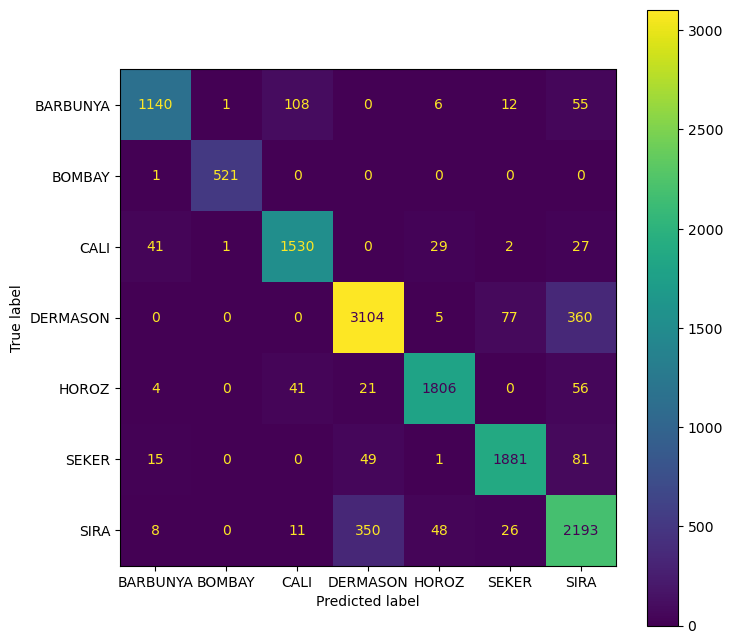

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# build and plot confusion matrix
conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))
conf_mat_disp.plot()

plt.gcf().set_size_inches(8, 8)

plt.grid(False)

# Part 4: OOP K-NN Classifier (+6 points extra credit)

Build an object oriented implementation of a K-NN classifier.  In the spirit of lab5's programming sequence:

- (+2 points) design an interface for all the behavior needed for a K-NN classifier
    - write pseudocode, docstrings and a few comments first
    - you're welcome to "steal" from sklearn's above
- (+2 points) write a set of `assert` test cases which validate and specify your design
- (+2 points) implement from the skeleton you've made above

In practice, using `sklearn`'s implementation is a almost always a better choice, though we're practicing our python skills here.  In this spirit, do not use anything from `sklearn` in your implementation.